<a href="https://colab.research.google.com/github/raonaqul-islam/ENEE691/blob/main/RI_Phys640_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project title: Greenhouse Effect and Surface Albedo
**Student name:** Raonaqul Islam \\
**Student ID:** IX73851 \\
**Date of submission:** 05/15/24

## Theory

Assuming there is no atmosphere, the surface temperature on earth can be estimated by,

$$T_s = \left( \frac{\alpha j^*}{4\sigma} \right)^{1/4}$$

where, $\alpha$ is the shortwave co-albedo, $r_e$ is the radius of earth, $j^* = 1366\;\textrm{W/m}^2$ is the solar constant, $\sigma$ is the Stefan-Boltzmann constant.

Now, when we include the atmosphere, the surface temperature is estimated using the following expression,

$$T_s = \left( \frac{\alpha j^*}{(1+\Gamma_a) \times 2\sigma} \right)^{1/4}$$

where, $\Gamma_a = 0.15$ is the broadband infrared transmittance of atmosphere.


## Surface temperature with and without atmosphere, at $\alpha = 0.7$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def surface_temperature(alpha,jstar,Gamma,isatmosphere):

  '''
    Inputs
      alpha : Shortwave co-albedo
      jstar : Solar constant
      Gamma : Broadband infrared transmittance
      isatmosphere : If atmosphere is condered, it's value is 1. If not, then 0.
  '''

  # Stefan-Boltzmann constant
  sigma = 5.67e-8

  # Atmosphere?
  if isatmosphere == 0:
    Gamma = 3 # If there is no atmosphere considered, Gamma is overridden

  Ts = (alpha*jstar/(1+Gamma)/2/sigma)**(1/4)

  return Ts

In [3]:
alpha = 0.7
jstar = 1366

# Without atmoshpere
Gamma = 0 # Any value
isatmosphere = 0 # No atmosphere
T_wout_atm = surface_temperature(alpha,jstar,Gamma,isatmosphere)

# With atmosphere
Gamma = 0.15
isatmosphere = 1 # There is atmosphere
T_with_atm = surface_temperature(alpha,jstar,Gamma,isatmosphere)

# Print values
print('Temperature without atmosphere = ',T_wout_atm)
print('Temperature with atmosphere = ',T_with_atm)

Temperature without atmosphere =  214.2737268666433
Temperature with atmosphere =  292.6236755987295


## $\alpha$ as a function of the surface temperature

Let us assume that the surface planetary co-albedo is a function of the surface temperature. It will then have different values at different conditions as follows: \\

*   Ice free earth, $\alpha_f = 0.7$
*   Earth covered by ice, $\alpha_i = 0.3$
*   In between, $\alpha(T_s)=\alpha_i+\frac{1}{2}(\alpha_f-\alpha_i)(1+\tanh \kappa T_s) $, where $\kappa = 0.1$ is a constant.



### Ice-free earth

In [4]:
alpha = 0.7
jstar = 1366
Gamma = 0.15
isatmosphere = 1 # There is atmosphere
Tf = surface_temperature(alpha,jstar,Gamma,isatmosphere)
print('Temperature when earth is ice-free = ',Tf)

Temperature when earth is ice-free =  292.6236755987295


### Ice-covered earth

In [5]:
alpha = 0.3
jstar = 1366
Gamma = 0.15
isatmosphere = 1 # There is atmosphere
Ti = surface_temperature(alpha,jstar,Gamma,isatmosphere)
print('Temperature when earth is completely covered with ice = ',Ti)

Temperature when earth is completely covered with ice =  236.76377989127923


### Earth partially covered with ice

For this problem, what we are going to do is, replace $\alpha$ (which is now a function of $T_s$) into Eq. (2). That way, we should obtain an expression for $T_s$. We would like to find the root of that expression using Newton's method. This root will give us an approximate temperature of earth surface when it is partially covered with ice. And, it will have value in between 281.5 K and 348 K. Therefore, as an initial guess to our root finding approach, we shall use 320.

In [6]:
# We import the Scipy package "optimize" that contains the Newton's method function
from scipy.optimize import newton

In [7]:
def get_alpha(Ts,alpha_i=0.3,alpha_f=0.7,kappa=0.1):
  alpha = alpha_i + 0.5*(alpha_f-alpha_i)*(1+np.tanh(kappa*(Ts-273)))
  return alpha

Let us first plot $\alpha$ as a function of $T_s$.

In [8]:
def straightline(co1,co2,x):
  '''
    Inputs:
      co1 : Co-ordinate of the first point
      co2 : Co-ordinate of the second point
      x : Array in x-axis
  '''
  x1,x2 = co1[0],co2[0]
  y1,y2 = co1[1],co2[1]
  y = y1+(y1-y2)/(x1-x2)*(x-x1)

  return y

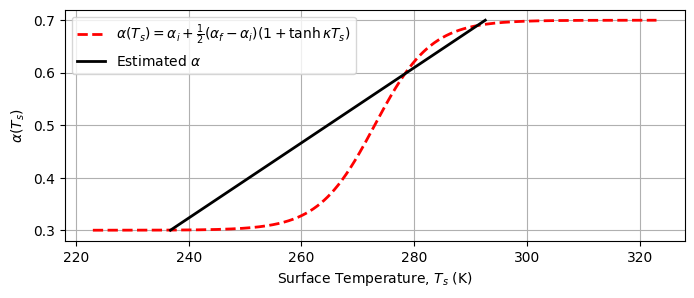

In [11]:
Ts = np.linspace(-50+273,50+273,1000)
a = get_alpha(Ts)

fig,ax = plt.subplots(figsize=(8,3))
ax.plot(Ts,a,lw=2,c='r',ls='--',label=r'$\alpha(T_s)=\alpha_i+\frac{1}{2}(\alpha_f-\alpha_i)(1+\tanh \kappa T_s)$')
ax.plot([Ti,Tf],[0.3,0.7],lw=2,c='k',label=r'Estimated $\alpha$')
ax.set_xlabel(r'Surface Temperature, $T_s$ (K)')
ax.set_ylabel(r'$\alpha(T_s)$')
ax.grid()
ax.legend()

From the plot, it is observed that $\alpha$ tends to saturate at 0.7 at temperatures larger than 400 K, and at 0.3 when the temperature is less than 150 K. The black line shows the estimated $\alpha$ values as a linear relationship. The two lines intersect near $T_s = 235, 275,$ and $295$ K. These are the locations where we would find the roots of the problem.  

In [13]:
def func(Ts):

  '''
    Inputs
      alpha : Shortwave co-albedo
      jstar : Solar constant
      Gamma : Broadband infrared transmittance
  '''

  sigma = 5.67e-8 # Stefan-Boltzmann constant
  jstar = 1366 # Solar constant
  Gamma = 0.15 # Broadband infrared transmittance

  alpha = get_alpha(Ts)
  y = Ts - (alpha*jstar/(1+Gamma)/2/sigma)**(1/4)

  return y

As mentioned earlier, we would apply Newton's method on the problem and the initial guess values will be 235, 275, and 295.

In [14]:
# Apply Newton's method to evaluate the temperature
Tp = newton(func,[235,275,295])
print('Surface temperature when partially covered with ice = ',Tp)

Surface temperature when partially covered with ice =  [236.82056299 275.59248664 291.63665575]


The newton function in the built-in package of Scipy is giving us the roots. These are the temperatures of different ice covered condition. $T_s = 236.82 \; \textrm{K}$ for the condition when earth is completely covered with ice, $T_s = 275.59 \; \textrm{K}$ for the condition when earth is partially covered with ice, and $T_s = 291.64 \; \textrm{K}$ when the earth is completely covered with ice.

## Perturbation of $\alpha$

In [15]:
def get_Ts(alpha,jstar,sigma,Gamma):
  Ts = (alpha*jstar/(1+Gamma)/2/sigma)**(1/4)
  return Ts

In [16]:
def get_alpha(Ts,alpha_i=0.3,alpha_f=0.7,kappa=0.1):
  alpha = alpha_i + 0.5*(alpha_f-alpha_i)*(1+np.tanh(kappa*(Ts-273)))
  return alpha

In [17]:
def error_func(T_new,T_old):
  error = np.abs(T_new-T_old)/T_old
  return error

### Ice free

Let us reduce $\alpha$ by 5% first. As we remember, for ice free earth, $T_s = 236.82$.

In [113]:
# Constants
sigma = 5.67e-8 # Stefan-Boltzmann constant
jstar = 1366 # Solar constant
Gamma = 0.15 # Broadband infrared transmittance

# Initializations
Ts_init = 236.82
alpha = get_alpha(Ts_init) # Get alpha for stable temperature
alpha_new = 0.95*alpha # Add perturbation
Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma) # Find new surface temperature for the perturbed alpha

In [114]:
print('No. | Temperature (K)')
print('----+-------------------')
Temperature1 = []
i = 1
while(True):
  print(i,'  |',Ts_new)
  alpha_old = alpha_new
  alpha_new = get_alpha(Ts_new)
  Ts_old = Ts_new
  Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma)
  Temperature1.append(Ts_new)
  if error_func(Ts_new,Ts_old)<1e-8:
    break
  i+=1

No. | Temperature (K)
----+-------------------
1   | 233.80311811816657
2   | 236.79484977164148
3   | 236.8202720400056
4   | 236.82055969244513
5   | 236.82056295558374


Now let us increase $\alpha$ by 5% and see what happens.

In [115]:
# Constants
sigma = 5.67e-8 # Stefan-Boltzmann constant
jstar = 1366 # Solar constant
Gamma = 0.15 # Broadband infrared transmittance

# Initializations
Ts_init = 236.82
alpha = get_alpha(Ts_init) # Get alpha for stable temperature
alpha_new = 1.05*alpha # Add perturbation
Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma) # Find new surface temperature for the perturbed alpha

In [116]:
print('No. | Temperature (K)')
print('----+-------------------')
Temperature2 = []
i = 1
while(True):
  print(i,'  |',Ts_new)
  alpha_old = alpha_new
  alpha_new = get_alpha(Ts_new)
  Ts_old = Ts_new
  Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma)
  Temperature2.append(Ts_new)
  if error_func(Ts_new,Ts_old)<1e-8:
    break
  i+=1

No. | Temperature (K)
----+-------------------
1   | 239.72687399487845
2   | 236.86523848193363
3   | 236.82107207415197
4   | 236.82056876852246
5   | 236.8205630585461


In the above two cases for ice-free earth, we see the surface temperature is stable and goes back to the original temperature after some time.

### Ice covered

For the completely ice covered earth, we reduce $\alpha$ by 5% first. As we remember, for ice covered earth, $T_s = 291.64$.

In [117]:
# Constants
sigma = 5.67e-8 # Stefan-Boltzmann constant
jstar = 1366 # Solar constant
Gamma = 0.15 # Broadband infrared transmittance

# Initializations
Ts_init = 291.64
alpha = get_alpha(Ts_init) # Get alpha for stable temperature
alpha_new = 0.95*alpha # Add perturbation
Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma) # Find new surface temperature for the perturbed alpha

In [118]:
print('No. | Temperature (K)')
print('----+-------------------')
Temperature3 = []
i = 1
while(True):
  print(i,'  |',Ts_new)
  alpha_old = alpha_new
  alpha_new = get_alpha(Ts_new)
  Ts_old = Ts_new
  Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma)
  Temperature3.append(Ts_new)
  if error_func(Ts_new,Ts_old)<1e-8:
    break
  i+=1

No. | Temperature (K)
----+-------------------
1   | 287.92141986997615
2   | 290.5901215142373
3   | 291.41207888126615
4   | 291.592190411668
5   | 291.6280037117687
6   | 291.63497803878005
7   | 291.63633064143744
8   | 291.63659275524367
9   | 291.63664354101195
10   | 291.6366533806941


Now we shoud increase $\alpha$ by 5% and see the result.

In [119]:
# Constants
sigma = 5.67e-8 # Stefan-Boltzmann constant
jstar = 1366 # Solar constant
Gamma = 0.15 # Broadband infrared transmittance

# Initializations
Ts_init = 291.64
alpha = get_alpha(Ts_init) # Get alpha for stable temperature
alpha_new = 1.05*alpha # Add perturbation
Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma) # Find new surface temperature for the perturbed alpha

In [120]:
print('No. | Temperature (K)')
print('----+-------------------')
Temperature4 = []
i = 1
while(True):
  print(i,'  |',Ts_new)
  alpha_old = alpha_new
  alpha_new = get_alpha(Ts_new)
  Ts_old = Ts_new
  Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma)
  Temperature4.append(Ts_new)
  if error_func(Ts_new,Ts_old)<1e-8:
    break
  i+=1

No. | Temperature (K)
----+-------------------
1   | 295.21634483382536
2   | 292.1366720314552
3   | 291.72900880378364
4   | 291.6543906823227
5   | 291.6400859814108
6   | 291.6373201251102
7   | 291.63678445887643
8   | 291.63668068285864
9   | 291.6366605768218
10   | 291.6366566813404


Again, even for a completely ice-covered earth, we found that the temperature of earth is stable enough. After about 10 iterations, both of them become stable after the perturbation of $\alpha$.

### Partially covered with ice

For partial ice covering, first let decrease the co-albedo by 5%. In this case, the surface temperature is $T_s = 275.59$ K.

In [121]:
# Constants
sigma = 5.67e-8 # Stefan-Boltzmann constant
jstar = 1366 # Solar constant
Gamma = 0.15 # Broadband infrared transmittance

# Initializations
Ts_init = 275.59
alpha = get_alpha(Ts_init) # Get alpha for stable temperature
alpha_new = 0.95*alpha # Add perturbation
Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma) # Find new surface temperature for the perturbed alpha

In [122]:
print('No. | Temperature (K)')
print('----+-------------------')
Temperature5 = []
i = 1
while(True):
  print(i,'  |',Ts_new)
  alpha_old = alpha_new
  alpha_new = get_alpha(Ts_new)
  Ts_old = Ts_new
  Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma)
  Temperature5.append(Ts_new)
  if error_func(Ts_new,Ts_old)<1e-8:
    break
  i+=1

No. | Temperature (K)
----+-------------------
1   | 272.0752892315493
2   | 266.4999755722356
3   | 252.10862211646594
4   | 237.94610038085514
5   | 236.8348789339051
6   | 236.82072563050997
7   | 236.82056483807574


So, we can see that if the co-albedo of partially ice covered earth is decreases by 5%, the surface temperature goes down to near the temperature of ice covered earth and becomes stable there.

Now, we increase $\alpha$ by 5% and see what happens.

In [134]:
# Constants
sigma = 5.67e-8 # Stefan-Boltzmann constant
jstar = 1366 # Solar constant
Gamma = 0.15 # Broadband infrared transmittance

# Initializations
Ts_init = 275.59
alpha = get_alpha(Ts_init) # Get alpha for stable temperature
alpha_new = 1.05*alpha # Add perturbation
Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma) # Find new surface temperature for the perturbed alpha

In [135]:
print('No. | Temperature (K)')
print('----+-------------------')
Temperature6 = []
i = 1
while(True):
  print(i,'  |',Ts_new)
  alpha_old = alpha_new
  alpha_new = get_alpha(Ts_new)
  Ts_old = Ts_new
  Ts_new = get_Ts(alpha_new,jstar,sigma,Gamma)
  Temperature6.append(Ts_new)
  if error_func(Ts_new,Ts_old)<1e-8:
    break
  i+=1

No. | Temperature (K)
----+-------------------
1   | 278.9687284913238
2   | 282.37465061450496
3   | 286.8991846952826
4   | 290.15018922180684
5   | 291.30340416312384
6   | 291.56997387198794
7   | 291.6236530028405
8   | 291.63413334062835
9   | 291.6361669171542
10   | 291.63656103160196
11   | 291.6366373945453
12   | 291.6366521898286


From the above solutions, we see the surface temperature goes up when $\alpha$ is increased by 5% and becomes stable near the completely ice free earth. Now, for partially ice covered earth, we can see that a little nudge to the co-albedo results in drammatic changes to the surface temperature. This will eventually change the co-albedo as a consequence which will make it stable at either at complete ice covered earth, or an ice free earth. Therefore, the partially ice covered earth is very sensitive to perturbations and not very stable.

This is very important for the stability of the weather in earth.

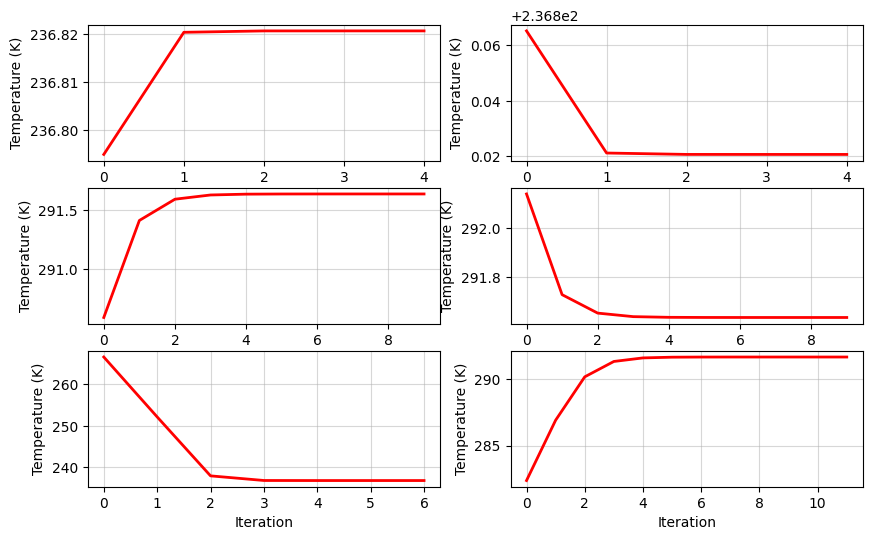

In [137]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,6))

ax[0,0].plot(np.arange(5),Temperature1,c='r',lw='2')
ax[0,0].set_xlabel('Iteration')
ax[0,0].set_ylabel('Temperature (K)')
ax[0,0].grid(alpha=0.5)

ax[0,1].plot(np.arange(5),Temperature2,c='r',lw='2')
ax[0,1].set_xlabel('Iteration')
ax[0,1].set_ylabel('Temperature (K)')
ax[0,1].grid(alpha=0.5)

ax[1,0].plot(np.arange(10),Temperature3,c='r',lw='2')
ax[1,0].set_xlabel('Iteration')
ax[1,0].set_ylabel('Temperature (K)')
ax[1,0].grid(alpha=0.5)

ax[1,1].plot(np.arange(10),Temperature4,c='r',lw='2')
ax[1,1].set_xlabel('Iteration')
ax[1,1].set_ylabel('Temperature (K)')
ax[1,1].grid(alpha=0.5)

ax[2,0].plot(np.arange(7),Temperature5,c='r',lw='2')
ax[2,0].set_xlabel('Iteration')
ax[2,0].set_ylabel('Temperature (K)')
ax[2,0].grid(alpha=0.5)

ax[2,1].plot(np.arange(12),Temperature6,c='r',lw='2')
ax[2,1].set_xlabel('Iteration')
ax[2,1].set_ylabel('Temperature (K)')
ax[2,1].grid(alpha=0.5)

The figure above summarizes how the surface temperatures behave in response to perturbations to $\alpha$.